#1. Creating a Data Frame

In [29]:
!pip install scikit-learn xgboost lightgbm imblearn

In [30]:
#importing all the required libraries, for organizing data within the dataset
import numpy as np
import pandas as pd

In [31]:
#reading the fraudTrain.csv and fraudTest.csv using the read_csv functiion
train_data=pd.read_csv('fraudTrain.csv')
test_data=pd.read_csv('fraudTest.csv')

In [32]:
pd.options.display.max_columns = None

In [33]:
train_data.head(15)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,PA,18917,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,KS,67851,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,VA,22824,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,PA,15665,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,TN,37040,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [34]:
#displaying number of rows and columns in the dataset
train_data.shape

(891211, 23)

In [35]:
print("Number of rows :",train_data.shape[0])
print("Number of columns :",train_data.shape[1])

Number of rows : 891211
Number of columns : 23


#2. Data Cleaning

In [36]:
#Display information about the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891211 entries, 0 to 891210
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             891211 non-null  int64  
 1   trans_date_trans_time  891211 non-null  object 
 2   cc_num                 891211 non-null  int64  
 3   merchant               891211 non-null  object 
 4   category               891211 non-null  object 
 5   amt                    891211 non-null  float64
 6   first                  891211 non-null  object 
 7   last                   891211 non-null  object 
 8   gender                 891211 non-null  object 
 9   street                 891211 non-null  object 
 10  city                   891211 non-null  object 
 11  state                  891211 non-null  object 
 12  zip                    891211 non-null  int64  
 13  lat                    891211 non-null  float64
 14  long                   891211 non-nu

In [37]:
train_data.isnull().sum() #the output indicates that we don't have any null value in our data

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [38]:
train_data.duplicated().any() #hence our dataset doesn't contain any duplicated value

False

In [39]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [40]:
#concatenating train_data and test_data
data = pd.concat([train_data,test_data],axis=0)
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [41]:
data.describe() #describing the dataset

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.446930e+06,1.446930e+06,1.446930e+06,1.446930e+06,1.446930e+06,1.446930e+06,1.446930e+06,1.446930e+06,1.446930e+06,1.446930e+06,1.446930e+06
mean,3.811792e+05,4.170890e+17,6.993286e+01,4.881272e+04,3.853739e+01,-9.022690e+01,8.879071e+04,1.357071e+09,3.853714e+01,-9.022702e+01,4.974671e-03
std,2.393909e+05,1.308795e+18,1.602013e+02,2.688496e+04,5.070189e+00,1.374863e+01,3.017821e+05,2.014902e+07,5.104551e+00,1.376039e+01,7.035571e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,1.808660e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.430000e+02,1.339917e+09,3.474287e+01,-9.690062e+01,0.000000e+00
50%,3.617320e+05,3.520550e+15,4.737000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.352055e+09,3.936841e+01,-8.743838e+01,0.000000e+00
75%,5.425980e+05,4.642255e+15,8.303000e+01,7.201100e+04,4.189480e+01,-8.015800e+01,2.032800e+04,1.377703e+09,4.195328e+01,-8.024198e+01,0.000000e+00
max,8.912100e+05,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695203e+01,1.000000e+00


In [42]:
#indexing each column
data.reset_index(inplace= True)
data.head(15)

,index,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,PA,18917,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,KS,67851,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,VA,22824,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,PA,15665,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,TN,37040,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [43]:
#removing unnecessary columns
data = data.drop(['index','Unnamed: 0'],axis = 1)

In [44]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


#3. Graph Plotting and Data Analysis

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

<Axes: xlabel='gender', ylabel='count'>

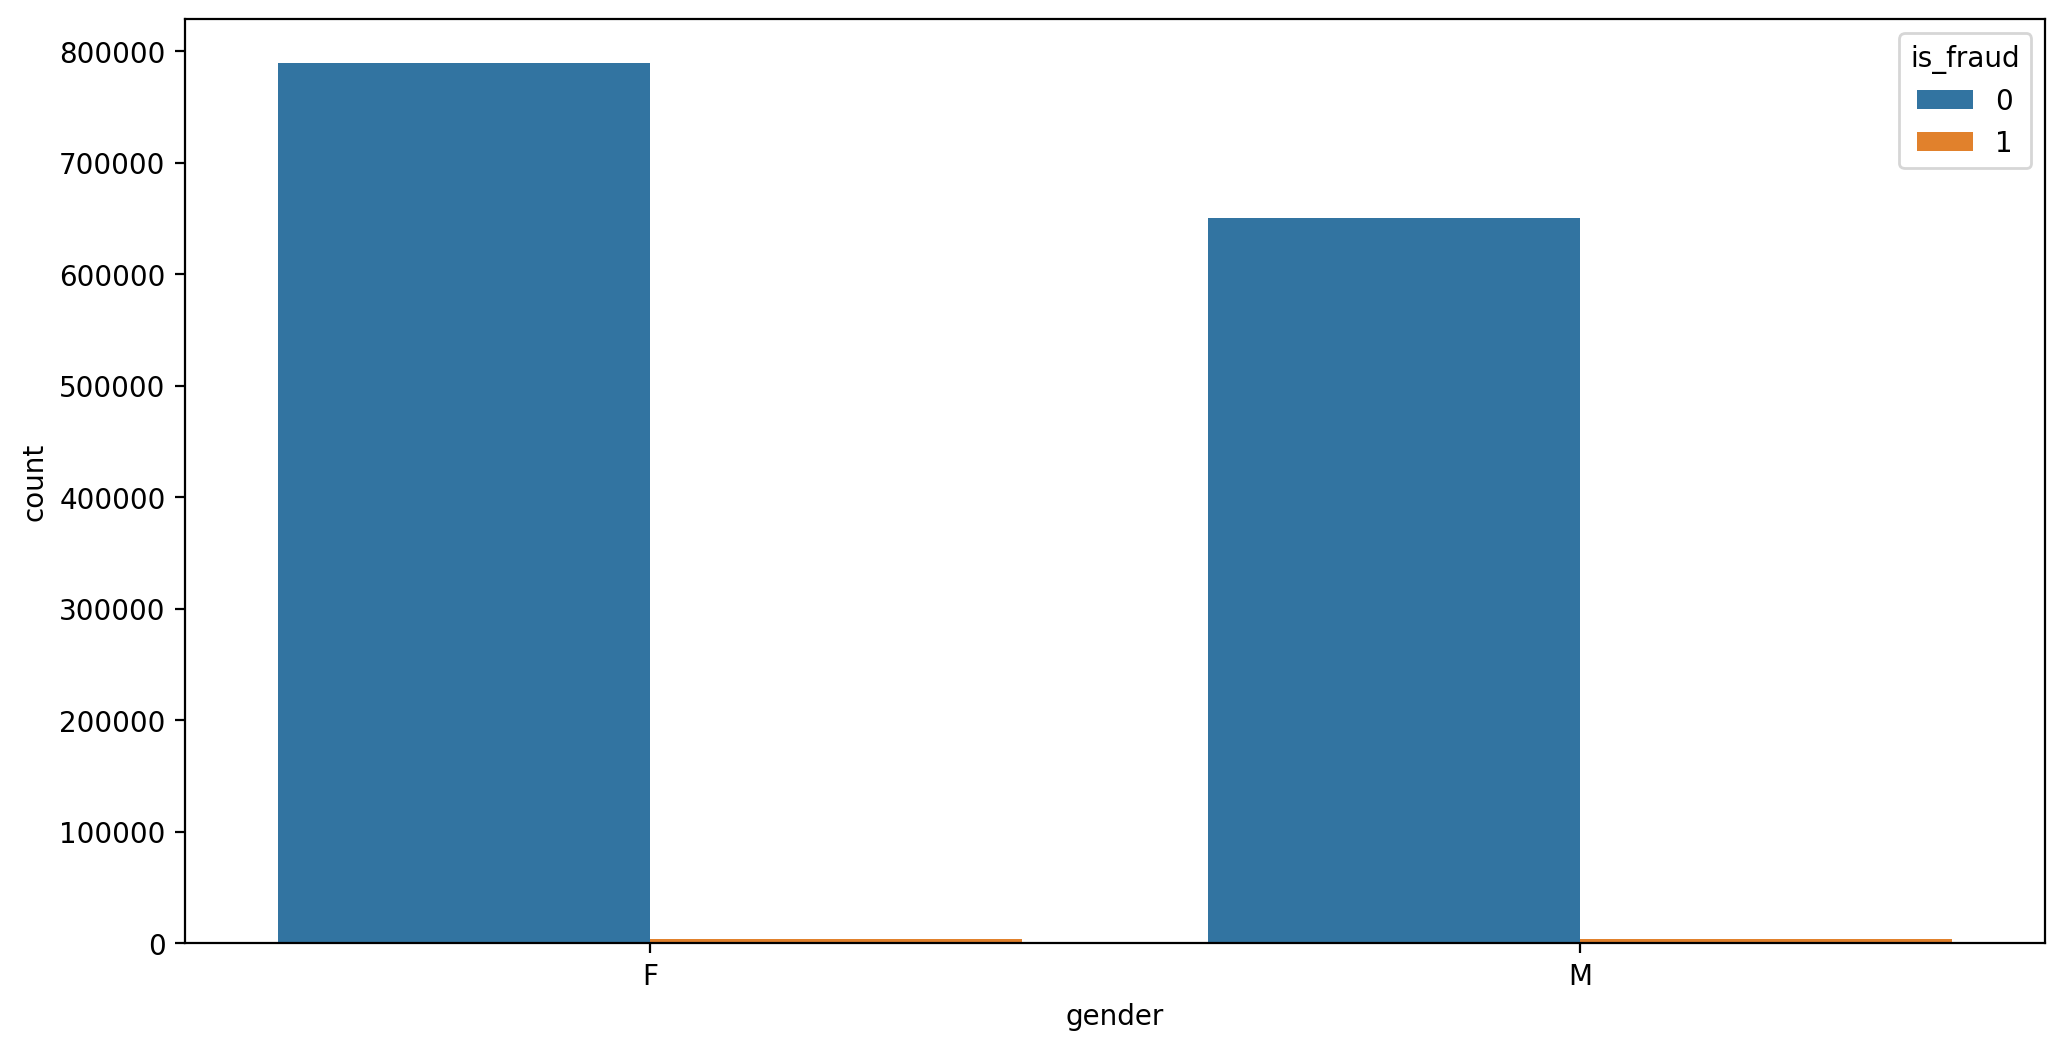

In [46]:
plt.figure(figsize= (12,6),dpi= 200)
sns.countplot(x= 'gender',hue = 'is_fraud',data = data)

In [47]:
X = data.drop(['is_fraud'],axis = 1)
Y = data['is_fraud']

#4. Model Building

In [48]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

In [49]:
#using encoder to convert all the data into numeric format
cols = ['trans_date_trans_time','merchant','category','first','last',
        'gender','street','city','state','job','dob','trans_num']
encoder = OrdinalEncoder()
X[cols] = encoder.fit_transform(X[cols])

In [50]:
#using minmaxscaler algorithm
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [51]:
Y = data[['is_fraud']].values

In [52]:
print('Independent Features Shape :',X.shape)
print('Dependent Features Shape :',Y.shape)

Independent Features Shape : (1446930, 21)
Dependent Features Shape : (1446930, 1)


#5. Model Training

In [53]:
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE

In [54]:
nm_sampler = NearMiss()
x_sampled, y_sampled = nm_sampler.fit_resample(X,Y)
print('Data :',x_sampled.shape)
print('Labels :',y_sampled.shape)

Data : (14396, 21)
Labels : (14396,)


In [55]:
# Splitting training and testing models!
x_train, x_test, y_train, y_test = train_test_split(x_sampled, y_sampled, test_size = 0.2, random_state = 2)

In [56]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (11516, 21)
Training Labels Shape :  (11516,)
Testing Data Shape    :  (2880, 21)
Testing Labels Shape  :  (2880,)


In [57]:
# Using Logistic Regression for training and prediction
lr_classifier = LogisticRegression()
lr_classifier.fit(x_train, y_train)

LogisticRegression()

In [58]:
pred_train = lr_classifier.predict(x_train)
pred_test  = lr_classifier.predict(x_test)

print('Training Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing  Accuracy : ', accuracy_score(y_test, pred_test))

Training Accuracy :  0.8005383813824245
Testing  Accuracy :  0.7965277777777777


In [59]:
print('Training Set f1 score : ', f1_score(y_train, pred_train))
print('Testing  Set f1 score : ', f1_score(y_test, pred_test))
print()
print('Test set precision : ', precision_score(y_test, pred_test))
print('Test set recall    : ', recall_score(y_test, pred_test))

Training Set f1 score :  0.7896712755242193
Testing  Set f1 score :  0.782802075611564

Test set precision :  0.8448
Test set recall    :  0.7292817679558011


In [60]:
# Function to create confusion matrix!
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [61]:
# Using Descision tree algorithm for training and prediction
dt_classifier = DecisionTreeClassifier(max_depth = 50, random_state = 100)
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=50, random_state=100)

In [62]:
pred_train = dt_classifier.predict(x_train)
pred_test  = dt_classifier.predict(x_test)

print('Training Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing  Accuracy : ', accuracy_score(y_test, pred_test))

Training Accuracy :  1.0
Testing  Accuracy :  0.9572916666666667


In [63]:
print('Training Set f1 score : ', f1_score(y_train, pred_train))
print('Testing  Set f1 score : ', f1_score(y_test, pred_test))
print()
print('Test set precision : ', precision_score(y_test, pred_test))
print('Test set recall    : ', recall_score(y_test, pred_test))

Training Set f1 score :  1.0
Testing  Set f1 score :  0.9574247144340603

Test set precision :  0.9597501734906315
Test set recall    :  0.955110497237569


In [64]:
# Using Random Forest Classifiers for training and prediction
rf_classifier = RandomForestClassifier(n_estimators = 100, max_depth = 12, random_state = 2)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=12, random_state=2)

In [65]:
pred_train = rf_classifier.predict(x_train)
pred_test  = rf_classifier.predict(x_test)

print('Training Set Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing Set Accuracy  : ', accuracy_score(y_test, pred_test))

Training Set Accuracy :  0.968391802709274
Testing Set Accuracy  :  0.9336805555555555


In [66]:
# Using OG Boost Classifiers for training and prediction
xg_classifier = XGBClassifier(n_estimators = 50)
xg_classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [67]:
pred_train = xg_classifier.predict(x_train)
pred_test  = xg_classifier.predict(x_test)

print('Training Set Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing Set Accuracy  : ', accuracy_score(y_test, pred_test))

Training Set Accuracy :  0.995484543244182
Testing Set Accuracy  :  0.9708333333333333


In [68]:
print('Training Set f1 score : ', f1_score(y_train, pred_train))
print('Testing  Set f1 score : ', f1_score(y_test, pred_test))

print()
print('Test set precision : ', precision_score(y_test, pred_test))
print('Test set recall    : ', recall_score(y_test, pred_test))

Training Set f1 score :  0.9954853273137697
Testing  Set f1 score :  0.9709141274238227

Test set precision :  0.9736111111111111
Test set recall    :  0.9682320441988951


In [69]:
# Using Light Gradient Boost Machine Classifiers for training and prediction
lg_classifier = LGBMClassifier(n_estimators = 50)
lg_classifier.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 5750, number of negative: 5766
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002875 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4570
[LightGBM] [Info] Number of data points in the train set: 11516, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499305 -> initscore=-0.002779
[LightGBM] [Info] Start training from score -0.002779


LGBMClassifier(n_estimators=50)

In [70]:
pred_train = lg_classifier.predict(x_train)
pred_test  = lg_classifier.predict(x_test)

print('Training Set Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing Set Accuracy  : ', accuracy_score(y_test, pred_test))

Training Set Accuracy :  0.9812434873219869
Testing Set Accuracy  :  0.9694444444444444


In [71]:
print('Training Set f1 score : ', f1_score(y_train, pred_train))
print('Testing  Set f1 score : ', f1_score(y_test, pred_test))

print()
print('Test set precision : ', precision_score(y_test, pred_test))
print('Test set recall    : ', recall_score(y_test, pred_test))

Training Set f1 score :  0.9812954624177347
Testing  Set f1 score :  0.9696132596685083

Test set precision :  0.9696132596685083
Test set recall    :  0.9696132596685083


In [72]:
# Using a sampler
smote_sampler = SMOTE()
x_sampled, y_sampled = smote_sampler.fit_resample(X, Y)

print('Data   : ', x_sampled.shape)
print('Labels : ', y_sampled.shape)

Data   :  (2879464, 21)
Labels :  (2879464,)


In [73]:
x_train, x_test, y_train, y_test = train_test_split(x_sampled, y_sampled, test_size = 0.2, random_state = 2)

print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (2303571, 21)
Training Labels Shape :  (2303571,)
Testing Data Shape    :  (575893, 21)
Testing Labels Shape  :  (575893,)


In [74]:
lr_classifier = LogisticRegression()
lr_classifier.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [75]:
pred_train = lr_classifier.predict(x_train)
pred_test  = lr_classifier.predict(x_test)

print('Training Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing  Accuracy : ', accuracy_score(y_test, pred_test))

Training Accuracy :  0.8744197595819708
Testing  Accuracy :  0.8746746357396252


In [76]:
print('Training Set f1 score : ', f1_score(y_train, pred_train))
print('Testing  Set f1 score : ', f1_score(y_test, pred_test))
print()
print('Test set precision : ', precision_score(y_test, pred_test))
print('Test set recall    : ', recall_score(y_test, pred_test))

Training Set f1 score :  0.864038103527932
Testing  Set f1 score :  0.8642764192172585

Test set precision :  0.9421891848675066
Test set recall    :  0.798265207226798


In [77]:
# Creating a .pkl file to serialize and save this model
import joblib
joblib.dump(lr_classifier,'CCFraudDetection.pkl')

['CCFraudDetection.pkl']